##  Work 2

In [1]:
#import relevant pkgs
import pandas as pd
import matplotlib.pyplot as plt


### 1. Data manipulaton 

In [2]:
# import "csv data" from online
data= pd.read_csv(
    "https://raw.githubusercontent.com/Patortiz26/IN6531-Miner-a-de-datos-2021-2/main/SFO.csv", index_col=(0))

In [3]:
#print data head
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Existing Construction Type,Zipcode,Record ID,days elapsed,permit duration,permit slack
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
131226,201607223097,8,otc alterations permit,07/22/2016,0986,021,3421,Jackson,St,remodel of exisitng s.f.h. remove & replace (...,...,94000.0,94000.0,1.0,1.0,5.0,94118.0,143106386136,NaN,360.0,NaN
167160,201608316424,8,otc alterations permit,08/31/2016,0943,006,2656,Filbert,St,revision to 201608054286 structural changes to...,...,50000.0,50000.0,1.0,1.0,5.0,94123.0,143564684896,344.0,360.0,39.0
13397,201305227621,8,otc alterations permit,05/22/2013,3569,014,2072,Mission,St,to comply with ordinance #029-13 only: install...,...,200.0,200.0,87.0,87.0,3.0,94110.0,1305642404944,50.0,360.0,310.0
89944,M597427,8,otc alterations permit,06/24/2015,6522,013,2860,Harrison,St,street space,...,NaN,1.0,NaN,NaN,NaN,94110.0,1386152206122,NaN,NaN,NaN
140843,M733647,8,otc alterations permit,10/27/2016,3582,005,430,Noe,St,street space,...,NaN,1.0,NaN,NaN,NaN,94114.0,1442267159920,NaN,NaN,NaN


In [4]:
# relevant information about the dataset

print(data.size)    #cantidad de datos en el dataframe
print(data.shape)   #dimensiones del DF == 39780 rows x 25 columns
data.dtypes         #tipo de datos por columna

994500
(39780, 25)


Permit Number                  object
Permit Type                     int64
Permit Type Definition         object
Permit Creation Date           object
Block                          object
Lot                            object
Street Number                   int64
Street Name                    object
Street Suffix                  object
Description                    object
Current Status                 object
Current Status Date            object
Number of Existing Stories    float64
Number of Proposed Stories    float64
Fire Only Permit               object
Estimated Cost                float64
Revised Cost                  float64
Existing Units                float64
Proposed Units                float64
Existing Construction Type    float64
Zipcode                       float64
Record ID                       int64
days elapsed                  float64
permit duration               float64
permit slack                  float64
dtype: object

In [5]:
print(pd.DataFrame(data.columns))   #name of each variable

                             0
0                Permit Number
1                  Permit Type
2       Permit Type Definition
3         Permit Creation Date
4                        Block
5                          Lot
6                Street Number
7                  Street Name
8                Street Suffix
9                  Description
10              Current Status
11         Current Status Date
12  Number of Existing Stories
13  Number of Proposed Stories
14            Fire Only Permit
15              Estimated Cost
16                Revised Cost
17              Existing Units
18              Proposed Units
19  Existing Construction Type
20                     Zipcode
21                   Record ID
22                days elapsed
23             permit duration
24                permit slack


In [6]:
print(pd.DataFrame(data.columns).size)    #quantity of variables

25


In [7]:
#create a dataframe that includes columns with NaNs
vacios = data.isna().any()[lambda x: x]     
print(vacios)                               #name of columns with NaNs
print(vacios.count())                       #number of columns with NaNs

Street Suffix                 True
Description                   True
Number of Existing Stories    True
Number of Proposed Stories    True
Fire Only Permit              True
Estimated Cost                True
Revised Cost                  True
Existing Units                True
Proposed Units                True
Existing Construction Type    True
Zipcode                       True
days elapsed                  True
permit duration               True
permit slack                  True
dtype: bool
14


In [8]:
#get the mean of columns with NaNs to fill them later

mean_nps=round(data['Number of Proposed Stories'].mean() ,0 )   
mean_days=round(data['days elapsed'].mean(),0)

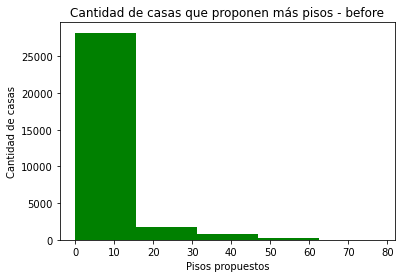

In [9]:
# get the these  variables with NaNs and will mean filled

plt.figure()    #histogram
plt.hist(data['Number of Proposed Stories'], bins=5,color="Green")
plt.xlabel('Pisos propuestos');
plt.title('Cantidad de casas que proponen más pisos - before');
plt.ylabel('Cantidad de casas');
plt.show()


In [10]:
# fill NaNs

print(data['Number of Proposed Stories'])   #before
data['Number of Proposed Stories']=data['Number of Proposed Stories'].fillna(mean_nps)  #fill NaNs with mean
print(data['Number of Proposed Stories'])   #after


Unnamed: 0
131226    3.0
167160    4.0
13397     3.0
89944     NaN
140843    NaN
         ... 
144872    7.0
122369    2.0
104052    2.0
94514     NaN
64489     NaN
Name: Number of Proposed Stories, Length: 39780, dtype: float64
Unnamed: 0
131226    3.0
167160    4.0
13397     3.0
89944     6.0
140843    6.0
         ... 
144872    7.0
122369    2.0
104052    2.0
94514     6.0
64489     6.0
Name: Number of Proposed Stories, Length: 39780, dtype: float64


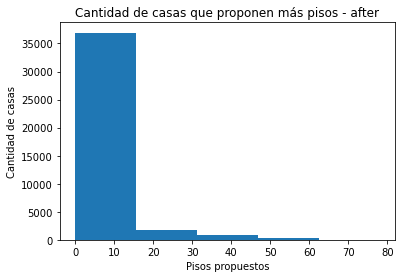

In [11]:

plt.figure()    #visualizamos una figura de histograma antes
plt.hist(data['Number of Proposed Stories'], bins=5)
plt.xlabel('Pisos propuestos');
plt.title('Cantidad de casas que proponen más pisos - after');
plt.ylabel('Cantidad de casas');
plt.show()


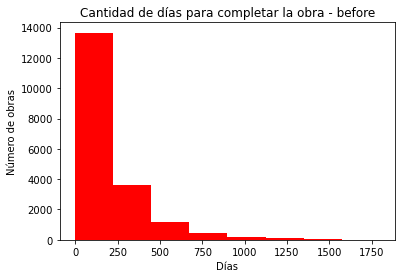

Unnamed: 0
131226      NaN
167160    344.0
13397      50.0
89944       NaN
140843      NaN
          ...  
144872     64.0
122369      0.0
104052      NaN
94514       NaN
64489       NaN
Name: days elapsed, Length: 39780, dtype: float64
Unnamed: 0
131226    190.0
167160    344.0
13397      50.0
89944     190.0
140843    190.0
          ...  
144872     64.0
122369      0.0
104052    190.0
94514     190.0
64489     190.0
Name: days elapsed, Length: 39780, dtype: float64


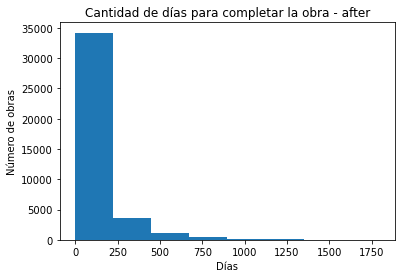

Street Suffix                 True
Description                   True
Number of Existing Stories    True
Fire Only Permit              True
Estimated Cost                True
Revised Cost                  True
Existing Units                True
Proposed Units                True
Existing Construction Type    True
Zipcode                       True
permit duration               True
permit slack                  True
dtype: bool
12


In [12]:
# repeat the process with the other column

plt.figure()    #visualizamos una figura de histograma antes
plt.hist(data['days elapsed'], bins=8, color='Red')
plt.xlabel('Días');
plt.title('Cantidad de días para completar la obra - before');
plt.ylabel('Número de obras');
plt.show()

print(data['days elapsed'])  
data['days elapsed']=data['days elapsed'].fillna(mean_days)  #reemplazamos las vacias
print(data['days elapsed'])  

plt.figure()    #visualizamos una figura de histograma antes
plt.hist(data['days elapsed'], bins=8)
plt.xlabel('Días');
plt.title('Cantidad de días para completar la obra - after');
plt.ylabel('Número de obras');
plt.show()

#verificamos que no hay vacios
vacios = data.isna().any()[lambda x: x]     #fila de faltantes
print(vacios)
print(vacios.count())                       #se redujeron a 12 las columnas vacías


In [13]:
# update the dataframe and check how many columns contain NaNs
vacios = data.isna().any()[lambda x: x]     #fila de faltantes
print(vacios)
print(vacios.count())                       #se redujeron a 12 las columnas vacías


Street Suffix                 True
Description                   True
Number of Existing Stories    True
Fire Only Permit              True
Estimated Cost                True
Revised Cost                  True
Existing Units                True
Proposed Units                True
Existing Construction Type    True
Zipcode                       True
permit duration               True
permit slack                  True
dtype: bool
12


In [15]:
# eliminate rows with NaNs in column "permit slack"

data['permit slack'].isnull() 
data=data.dropna(how='any', 
            subset=['permit slack']) #[19223 rows x 25 columns] => se redujeron las observaciones

print(data['permit slack'].isnull()) #check


Unnamed: 0
167160    False
13397     False
107198    False
126725    False
173600    False
          ...  
17171     False
88280     False
98544     False
144872    False
122369    False
Name: permit slack, Length: 19223, dtype: bool


In [17]:
#fill all NaNs in the dataset with False (booleans)

data.fillna(False)        #llenamos con False los NaN, porque en su mayoría NO APLICAN!

data.fillna(False).isna().any()[lambda x: x]    #comprobamos que ya no hay columnas con datos NaN 


Series([], dtype: bool)

In [20]:
#consolide the dataframe

df_alpha = data.fillna(False)          #guardamos la dataframe sin datos faltantes
df_alpha.isna().any()[lambda x: x] #comprobamos

df_alpha

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Existing Construction Type,Zipcode,Record ID,days elapsed,permit duration,permit slack
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
167160,201608316424,8,otc alterations permit,08/31/2016,0943,006,2656,Filbert,St,revision to 201608054286 structural changes to...,...,50000.0,50000.0,1.0,1.0,5.0,94123.0,143564684896,344.0,360.0,39.0
13397,201305227621,8,otc alterations permit,05/22/2013,3569,014,2072,Mission,St,to comply with ordinance #029-13 only: install...,...,200.0,200.0,87.0,87.0,3.0,94110.0,1305642404944,50.0,360.0,310.0
107198,201511253630,3,additions alterations or repairs,11/25/2015,1808,049,4041,Judah,St,change of use from (e) laundry to a full servi...,...,40000.0,55000.0,0.0,0.0,5.0,94122.0,1404662115181,435.0,360.0,227.0
126725,201606099480,8,otc alterations permit,06/09/2016,6013,009,184,London,St,replace partial foundation on lower floor per ...,...,5000.0,12000.0,1.0,1.0,5.0,94112.0,1426074193972,264.0,360.0,118.0
173600,201609016620,3,additions alterations or repairs,09/01/2016,0098,005,1048,Union,St,soft story retrofit to comply w/ sfbc chap 34b...,...,300000.0,300000.0,20.0,20.0,5.0,94133.0,1435924231352,456.0,1080.0,726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,201306280725,3,additions alterations or repairs,06/28/2013,0270,037,430,Bush,St,a modification to an extg unmanned roof top te...,...,9000.0,9000.0,False,False,2.0,94108.0,1309586348988,215.0,360.0,297.0
88280,201506088404,8,otc alterations permit,06/08/2015,6411,032,960,Geneva,Av,repair and replace car damage front metal gate...,...,12500.0,12500.0,1.0,1.0,5.0,94112.0,1384378202481,56.0,360.0,304.0
98544,201509116755,8,otc alterations permit,09/11/2015,5865,003,16,Princeton,St,replace rotted wood at base of bay (1 bay @ 2...,...,4600.0,4600.0,1.0,1.0,5.0,94134.0,1395400189674,81.0,360.0,279.0


### 2. Graphs